In [7]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_simple_pose, heatmap_to_coord
import cv2

In [8]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)

In [46]:
model_zoo.get_model_list()

dict_keys(['resnet18_v1', 'resnet34_v1', 'resnet50_v1', 'resnet101_v1', 'resnet152_v1', 'resnet18_v2', 'resnet34_v2', 'resnet50_v2', 'resnet101_v2', 'resnet152_v2', 'se_resnet18_v1', 'se_resnet34_v1', 'se_resnet50_v1', 'se_resnet101_v1', 'se_resnet152_v1', 'se_resnet18_v2', 'se_resnet34_v2', 'se_resnet50_v2', 'se_resnet101_v2', 'se_resnet152_v2', 'vgg11', 'vgg13', 'vgg16', 'vgg19', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'alexnet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'squeezenet1.0', 'squeezenet1.1', 'googlenet', 'inceptionv3', 'xception', 'xception71', 'mobilenet1.0', 'mobilenet0.75', 'mobilenet0.5', 'mobilenet0.25', 'mobilenetv2_1.0', 'mobilenetv2_0.75', 'mobilenetv2_0.5', 'mobilenetv2_0.25', 'mobilenetv3_large', 'mobilenetv3_small', 'mobile_pose_resnet18_v1b', 'mobile_pose_resnet50_v1b', 'mobile_pose_mobilenet1.0', 'mobile_pose_mobilenetv2_1.0', 'mobile_pose_mobilenetv3_large', 'mobile_pose_mobilenetv3_small', 'ssd_300_vgg16_atrous_voc', 'ssd_300_vgg1

In [47]:
pose_net = model_zoo.get_model('ssd_300_vgg16_atrous_coco', pretrained=True)

100%|██████████| 125080/125080 [00:14<00:00, 8348.51KB/s]


In [48]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/pose/soccer.png?raw=true',
                          path='soccer.png')

In [49]:
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)

In [50]:
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 605)


In [38]:
class_IDs, scores, bounding_boxs = detector(x)

In [39]:
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)

In [40]:
predicted_heatmap = pose_net(pose_input)

In [41]:
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

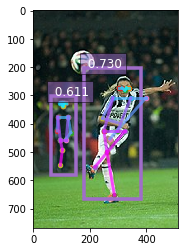

In [44]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)

In [20]:
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)

In [21]:
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 605)


In [24]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

/Users/mansoorkhan/Documents/action_detection/venv/lib/python3.7/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [25]:
class_IDs, scores, bounding_boxes = net(x)

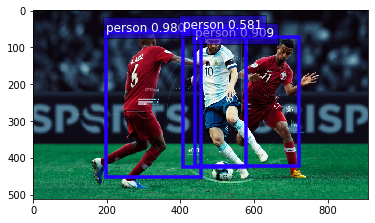

In [26]:
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)

In [ ]:
import cv2

In [27]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:36, 6191.19KB/s]                            


In [31]:
im_fname = 'football2.jpg'

In [32]:
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 768, 512)


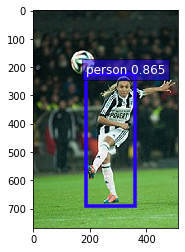

In [33]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)